### Clase 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [3]:
class Iterable:
    def __init__(self, file_name, index = 0):
        self.read_data = pd.read_csv(file_name)
        self.index = index
        
    def gen_data(self):
        if self.index >= len(self.read_data):
            print("Error 404!! Archivo no encontrado")
            return None
        
        rows = self.read_data.iloc[self.index:(self.index + 2)] 
        self.index += 2
        
        return rows

    def __str__(self):
        return str(self.read_data)


In [39]:
class Stats(Iterable):
            
    def summary(self):
        return self.read_data.describe()
    
    def names(self):
        return list(self.read_data.columns)
    
    def resume(self, name, bins = 20, kde = True):
        var = self.read_data[name]     
        
        media = np.mean(var)
        mediana = np.median(var)
        desviacion_estandar = np.std(var)        
        q25 = np.percentile(var, 25)
        q50 = np.percentile(var, 50)
        q75 = np.percentile(var, 75)

        resultados = pd.DataFrame({
            'Media': [media],
            'Mediana': [mediana],
            'Desviación Estándar': [desviacion_estandar],
            'Q25': [q25],
            'Q50': [q50],
            'Q75': [q75]
        })
        
        sns.histplot(var, bins = bins, kde = kde, color = 'skyblue', edgecolor = 'black')
        plt.xlabel(name)
        plt.ylabel('Frecuencia')
        plt.title(f'Histograma de {name}')
        plt.show()
        
        return resultados

In [41]:
df = Stats('./Data/iris.csv')

Cálculo de los estadísticos resumen del data frame creado en la instancia *df* 

In [42]:
df.summary()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Obtenemos los nombres de las columnas del objeto *df* 

In [43]:
df.names()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

Por último, con el método *resume()* de la clase *Stats*, se obtienen estadísticas más precisas de una de las variables del objeto *df*.

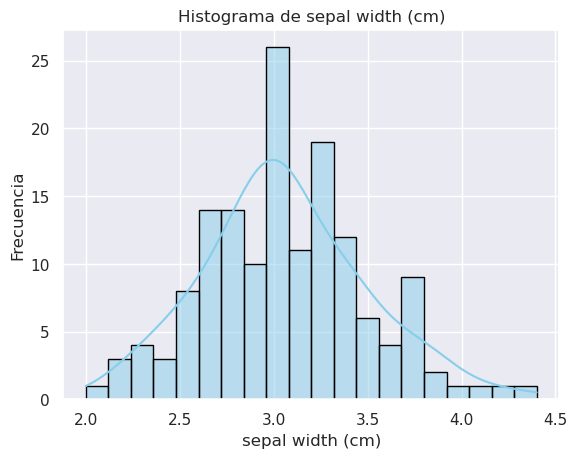

,Media,Mediana,Desviación Estándar,Q25,Q50,Q75
0,3.057333,3.0,0.434411,2.8,3.0,3.3


In [44]:
df.resume('sepal width (cm)')